# Integrative Plots

In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

## 1. Enrichr Submissions

In [3]:
f = pd.read_feather('./s1-normalized.dir/zscore.feather').set_index('gene_symbol')
f.head()

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



A1BGAS1       A1CF        A2M      A2ML1      A2MP1   A3GALT2  \
gene_symbol                                                                    
A1BGAS1      31.720125   0.863797   2.065991   0.222626  -0.538764 -0.097959   
A1CF         -0.430321  33.948834   3.304075   0.263570  -0.531251 -0.354624   
A2M          -0.571351   0.548181  34.571861   0.110469  -0.529263 -0.440879   
A2ML1        -0.571922   0.462621   2.458850  37.924708  -0.484496 -0.411641   
A2MP1         0.868106   4.138703   9.953097   3.896436  38.177136  0.383573   

               A4GALT     A4GNT      AACS    AACSP1    ...         ZW10  \
gene_symbol                                            ...                
A1BGAS1      1.905699 -0.378471  1.745406  0.022261    ...    -0.218178   
A1CF         0.831299  0.995310  1.840595 -0.556483    ...    -0.253694   
A2M          1.575121 -0.306199  0.687071 -0.714449    ...    -0.163100   
A2ML1        2.152859  0.156629  1.846867  0.171200    ...    -0.047365   
A2MP1        3.048504  1.958305  2.200571  1.958305    ...    -0.585493   

               ZWILCH     ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A  \
gene_symbol                                                               
A1BGAS1     -0.097959  0.903870  0.142480 -0.017813 -0.218178  1.264528   
A1CF         0.503278  0.944845 -0.430321 -0.152765 -0.203230  0.768218   
A2M          0.729158  1.865526 -0.407209 -0.213606 -0.415627  0.009459   
A2ML1        0.972606  2.546276 -0.295072 -0.440783 -0.163933  0.870609   
A2MP1       -0.222093  0.262440 -0.464359 -0.100960 -0.827759 -0.222093   

               ZYG11B     ZZEF1      ZZZ3  
gene_symbol                                
A1BGAS1      0.583285  0.543212 -0.138032  
A1CF         0.578975  0.932229  0.465429  
A2M          0.026294  0.072591 -0.078925  
A2ML1       -0.222217 -0.076507 -0.076507  
A2MP1        0.020173  0.868106 -0.585493  

[5 rows x 23568 columns]

In [4]:
def readGMT(infile):
    gmt = {}
    with open(infile) as openfile:
        for line in openfile.read().split('\n'):
            split_line = line.strip().split('\t')
            if split_line[0]:
                gmt[split_line[0]] = [x.split(',')[0] for x in split_line[2:]]
    return gmt

In [5]:
count_dataframe = pd.read_feather('./feather.dir/list_off_co.feather').set_index('gene_symbol')

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



In [6]:
count_dataframe.iloc[:5,:5]

A1BGAS1  A1CF   A2M  A2ML1  A2MP1
gene_symbol                                   
A1BGAS1          821    51    81     35     16
A1CF              51  2776   347    106     43
A2M               81   347  8431    243     91
A2ML1             35   106   243   2677     41
A2MP1             16    43    91     41    324

In [43]:
# Get counts
gene_count_dataframe = pd.Series(np.diag(count_dataframe), index=count_dataframe.index, name='enrichr_counts').to_frame()
print(gene_count_dataframe.shape)
gene_count_dataframe.head()

(23568, 1)


enrichr_counts
gene_symbol                
A1BGAS1                 821
A1CF                   2776
A2M                    8431
A2ML1                  2677
A2MP1                   324

## 2. Associated Genesets

In [8]:
# Get GMT
gmt_files = glob.glob('./libraries.dir/*.txt')

In [9]:
# Read GMTs
libraries = {os.path.basename(gmt_file)[:-len('.txt')]: readGMT(gmt_file) for gmt_file in gmt_files}

In [10]:
# libraries_merged = {library_name: [gene for term_genes in gmt.values() for gene in term_genes] for library_name, gmt in libraries.items()}

In [12]:
# Get counts
# gmt_counts = {library_name: {gene: genes_merged.count(gene) for gene in gene_count_dataframe.index} for library_name, genes_merged in libraries_merged.items()}

In [ ]:
# Convert to dataframe
# gmt_count_dataframe = pd.DataFrame(gmt_counts)
# print(gmt_count_dataframe.shape)
# gmt_count_dataframe.head()

In [23]:
gmt_count_dataframe = pd.read_table('./rawdata.dir/gmt_counts.txt').set_index('Unnamed: 0').rename_axis('gene_symbol')
gmt_count_dataframe.head()

GO_Molecular_Function_2018  ARCHS4_TFs_Coexp  Reactome_2016  \
gene_symbol                                                                
A1BGAS1                               0                 0              0   
A1CF                                  2                26              1   
A2M                                   6                16             16   
A2ML1                                 1                18              0   
A2MP1                                 0                 4              0   

             ARCHS4_Kinases_Coexp  KEGG_2016  GO_Biological_Process_2018  SCP  \
gene_symbol                                                                     
A1BGAS1                         0          0                           0    0   
A1CF                            6          0                           3    4   
A2M                            11          1                           8    4   
A2ML1                           3          0                           2    1   
A2MP1                           0          0                           0    0   

             GO_Cellular_Component_2018  ChEA_2016  
gene_symbol                                         
A1BGAS1                               0          0  
A1CF                                  0         29  
A2M                                   3         23  
A2ML1                                 0         22  
A2MP1                                 0          0

## 3. Average Expression

In [18]:
# Read ARCHS4 HDF5
infile = '/Users/denis/Documents/Projects/jupyter-notebook/notebook-generator/database/data/archs4/rawdata.dir/v6/human_matrix.h5'
r = h5py.File(infile, 'r')

# Get matrix data
expr = r['data']['expression'].value
genes = r['meta']['genes'].value.astype(str)

In [20]:
# Get mean
mean_dataframe = pd.Series(data=np.mean(expr[:5000, :], axis=0), index=genes).rename('average_counts').to_frame()
mean_dataframe.head()

average_counts
A1BG         245.6486
A1CF         105.8496
A2M         3858.3808
A2ML1        280.2658
A2MP1         20.8244

## 4. GeneRIF and AutoRIF

In [34]:
# List
rif_counts = []

# Read
for infile in glob.glob('feather.dir/*_overlap.feather'):
    rif_dataframe = pd.read_feather(infile).set_index('gene_symbol')
    rif_count_dataframe = pd.Series(np.diag(rif_dataframe), name=os.path.basename(infile).split('_')[0], index=rif_dataframe.index).to_frame()
    rif_counts.append(rif_count_dataframe)

/Users/denis/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



In [39]:
rif_counts_dataframe = rif_counts[0].merge(rif_counts[1], left_index=True, right_index=True)
rif_counts_dataframe.head()

autorif  generif
gene_symbol                    
1300017J02RIK        1        1
1700013H16RIK        1        4
1700093K21RIK        1        1
2010109I03RIK        1        1
2410089E03RIK        1        1

## 5. Merge

In [41]:
from functools import reduce

In [45]:
# Merge
dataframes = [gene_count_dataframe, gmt_count_dataframe, mean_dataframe, rif_counts_dataframe]
merged_dataframe = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how='inner'), dataframes)
print(merged_dataframe.shape)
merged_dataframe.head()

(9216, 13)


enrichr_counts  GO_Molecular_Function_2018  ARCHS4_TFs_Coexp  \
A1CF               2776                           2                26   
A2M                8431                           6                16   
A2ML1              2677                           1                18   
A2MP1               324                           0                 4   
A3GALT2            1322                           0                 0   

         Reactome_2016  ARCHS4_Kinases_Coexp  KEGG_2016  \
A1CF                 1                     6          0   
A2M                 16                    11          1   
A2ML1                0                     3          0   
A2MP1                0                     0          0   
A3GALT2              0                     0          0   

         GO_Biological_Process_2018  SCP  GO_Cellular_Component_2018  \
A1CF                              3    4                           0   
A2M                               8    4                           3   
A2ML1                             2    1                           0   
A2MP1                             0    0                           0   
A3GALT2                           4    1                           0   

         ChEA_2016  average_counts  autorif  generif  
A1CF            29        105.8496       42        5  
A2M             23       3858.3808      452       71  
A2ML1           22        280.2658       24        9  
A2MP1            0         20.8244        1        3  
A3GALT2          8          1.8644        4        1

In [68]:
rif_counts_dataframe.shape

(11086, 2)

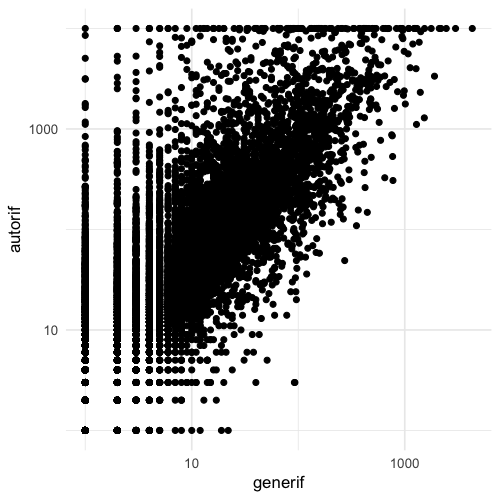

In [75]:
%%R -i merged_dataframe -h 500 -w 500 -r 110
ggplot(merged_dataframe, aes(x=generif, y=autorif)) +
    scale_x_log10() +
    scale_y_log10() +
    geom_point() +
    theme_minimal()

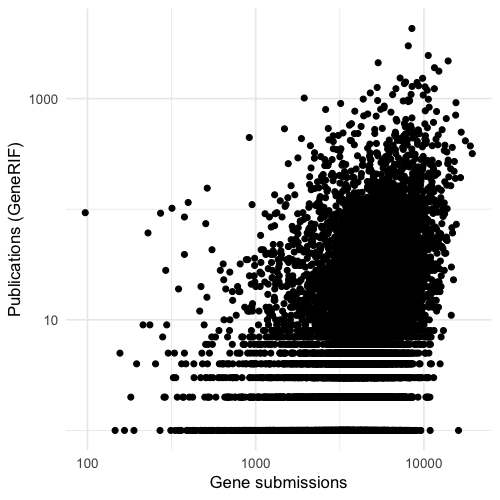

In [98]:
%%R -i merged_dataframe -h 500 -w 500 -r 110
ggplot(merged_dataframe, aes(x=enrichr_counts, y=generif)) +
    scale_x_log10() +
    scale_y_log10() +
    geom_point() +
    xlab('Gene submissions') + 
    ylab('Publications (GeneRIF)') +
    theme_minimal()

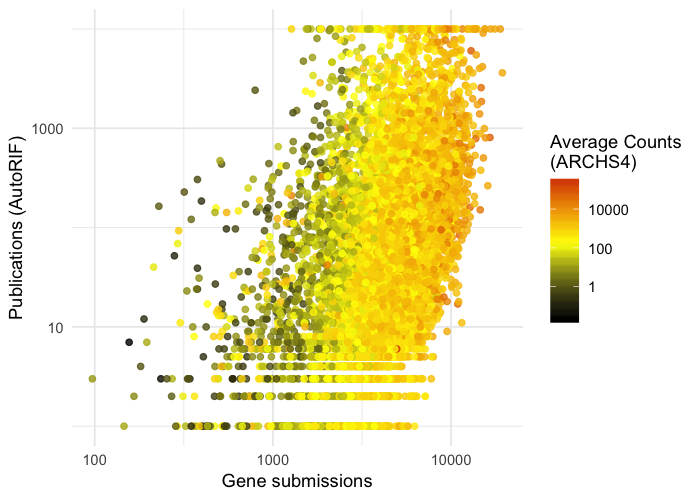

In [147]:
%%R -i merged_dataframe -h 500 -w 700 -r 120
ggplot(merged_dataframe, aes(x=enrichr_counts, y=autorif, color=average_counts)) +
    scale_x_log10() +
    scale_y_log10() +
    scale_color_gradient2('Average Counts\n(ARCHS4)', low='black', mid='yellow', high='red3', trans='log10', midpoint=2.2) + 
    geom_point(alpha=0.8) +
    xlab('Gene submissions') + 
    ylab('Publications (AutoRIF)') +
    theme_minimal()

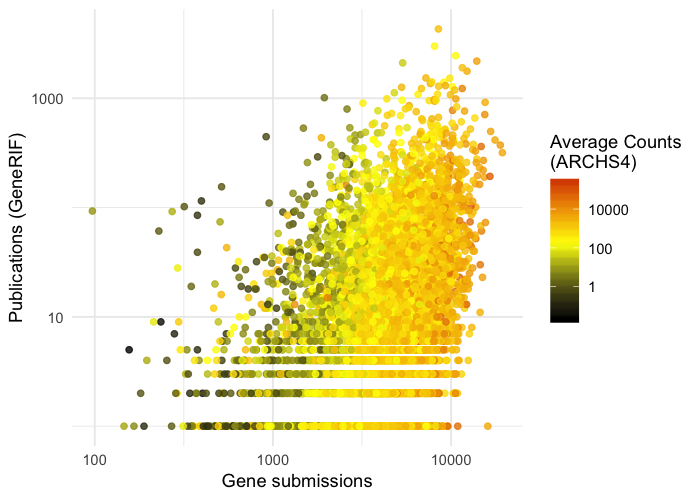

In [148]:
%%R -i merged_dataframe -h 500 -w 700 -r 120
ggplot(merged_dataframe, aes(x=enrichr_counts, y=generif, color=average_counts)) +
    scale_x_log10() +
    scale_y_log10() +
    scale_color_gradient2('Average Counts\n(ARCHS4)', low='black', mid='yellow', high='red3', trans='log10', midpoint=2.2) + 
    geom_point(alpha=0.8) +
    xlab('Gene submissions') + 
    ylab('Publications (GeneRIF)') +
    theme_minimal()

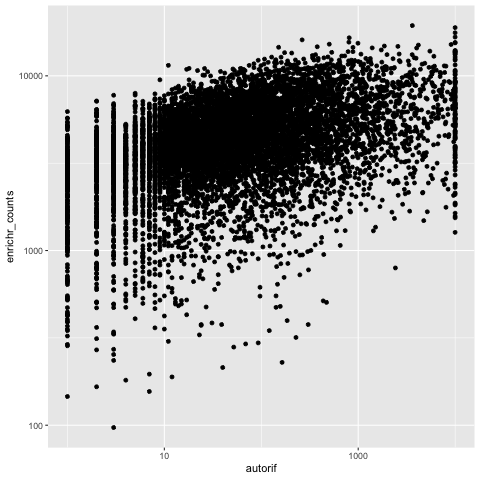

In [49]:
%%R -i merged_dataframe
ggplot(merged_dataframe, aes(x=autorif, y=enrichr_counts)) +
    scale_x_log10() +
    scale_y_log10() +
    geom_point()

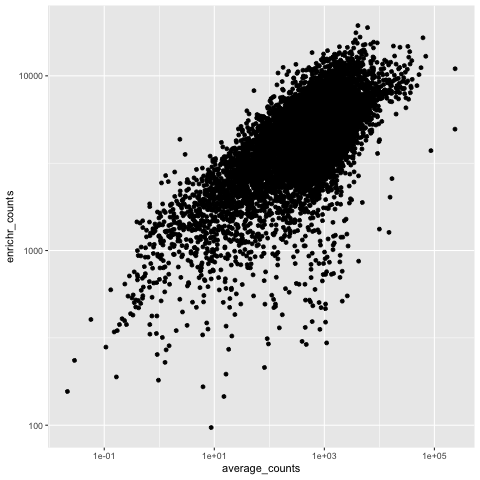

In [50]:
%%R -i merged_dataframe
ggplot(merged_dataframe, aes(x=average_counts, y=enrichr_counts)) +
    scale_x_log10() +
    scale_y_log10() +
    geom_point()

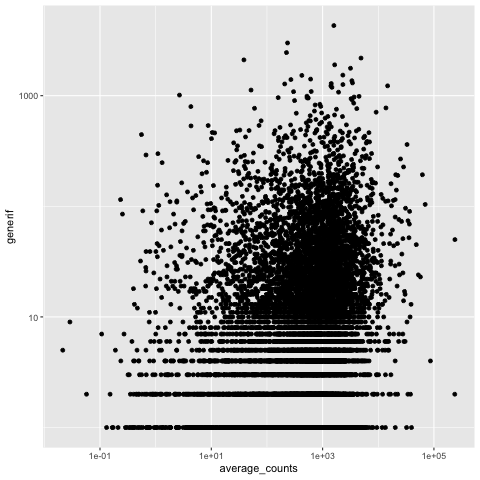

In [65]:
%%R -i merged_dataframe
ggplot(merged_dataframe, aes(x=average_counts, y=generif)) +
    scale_x_log10() +
    scale_y_log10() +
    geom_point()

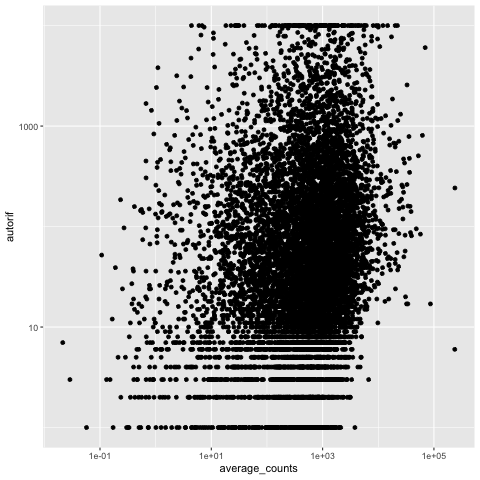

In [66]:
%%R -i merged_dataframe
ggplot(merged_dataframe, aes(x=average_counts, y=autorif)) +
    scale_x_log10() +
    scale_y_log10() +
    geom_point()

In [52]:
merged_dataframe.head()

enrichr_counts  GO_Molecular_Function_2018  ARCHS4_TFs_Coexp  \
A1CF               2776                           2                26   
A2M                8431                           6                16   
A2ML1              2677                           1                18   
A2MP1               324                           0                 4   
A3GALT2            1322                           0                 0   

         Reactome_2016  ARCHS4_Kinases_Coexp  KEGG_2016  \
A1CF                 1                     6          0   
A2M                 16                    11          1   
A2ML1                0                     3          0   
A2MP1                0                     0          0   
A3GALT2              0                     0          0   

         GO_Biological_Process_2018  SCP  GO_Cellular_Component_2018  \
A1CF                              3    4                           0   
A2M                               8    4                           3   
A2ML1                             2    1                           0   
A2MP1                             0    0                           0   
A3GALT2                           4    1                           0   

         ChEA_2016  average_counts  autorif  generif  
A1CF            29        105.8496       42        5  
A2M             23       3858.3808      452       71  
A2ML1           22        280.2658       24        9  
A2MP1            0         20.8244        1        3  
A3GALT2          8          1.8644        4        1

In [53]:
melted_dataframe = pd.melt(merged_dataframe.rename_axis('gene_symbol').reset_index(), id_vars=['gene_symbol', 'enrichr_counts', 'average_counts', 'autorif', 'generif'])
melted_dataframe.head()

gene_symbol  enrichr_counts  average_counts  autorif  generif  \
0        A1CF            2776        105.8496       42        5   
1         A2M            8431       3858.3808      452       71   
2       A2ML1            2677        280.2658       24        9   
3       A2MP1             324         20.8244        1        3   
4     A3GALT2            1322          1.8644        4        1   

                     variable  value  
0  GO_Molecular_Function_2018      2  
1  GO_Molecular_Function_2018      6  
2  GO_Molecular_Function_2018      1  
3  GO_Molecular_Function_2018      0  
4  GO_Molecular_Function_2018      0

In [54]:
melted_dataframe.shape

(82944, 7)

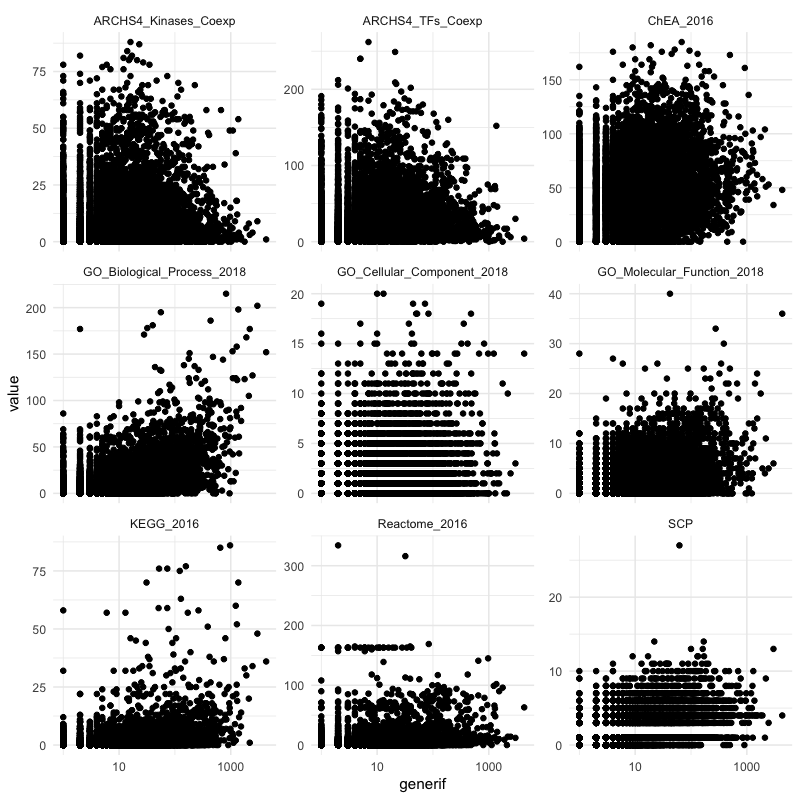

In [59]:
%%R -i melted_dataframe -h 800 -w 800 -r 100
ggplot(melted_dataframe, aes(x=generif, y=value)) +
    geom_point() +
    facet_wrap(~variable, nrow=3, scales='free_y') +
    scale_x_log10() + 
    theme_minimal()

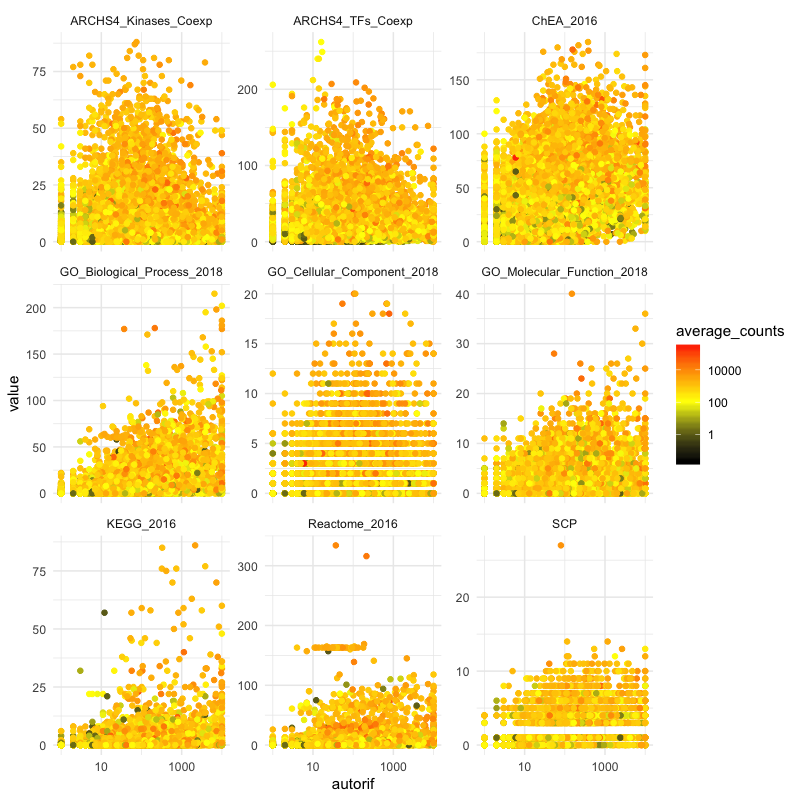

In [64]:
%%R -i melted_dataframe -h 800 -w 800 -r 100
ggplot(melted_dataframe, aes(x=autorif, y=value, color=average_counts)) +
    geom_point() +
    facet_wrap(~variable, nrow=3, scales='free_y') +
    scale_color_gradient2(low='black', mid='yellow', high='red', trans='log10', midpoint=2) + 
    scale_x_log10() + 
    theme_minimal()

In [157]:
# melt
filtered_dataframe = pd.melt(merged_dataframe[['enrichr_counts', 'autorif', 'generif', 'average_counts']].rename_axis('gene_symbol').reset_index(), id_vars=['gene_symbol', 'enrichr_counts', 'average_counts']).replace('autorif', 'AutoRIF').replace('generif', 'GeneRIF')
filtered_dataframe.head()

gene_symbol  enrichr_counts  average_counts variable  value
0        A1CF            2776        105.8496  AutoRIF     42
1         A2M            8431       3858.3808  AutoRIF    452
2       A2ML1            2677        280.2658  AutoRIF     24
3       A2MP1             324         20.8244  AutoRIF      1
4     A3GALT2            1322          1.8644  AutoRIF      4

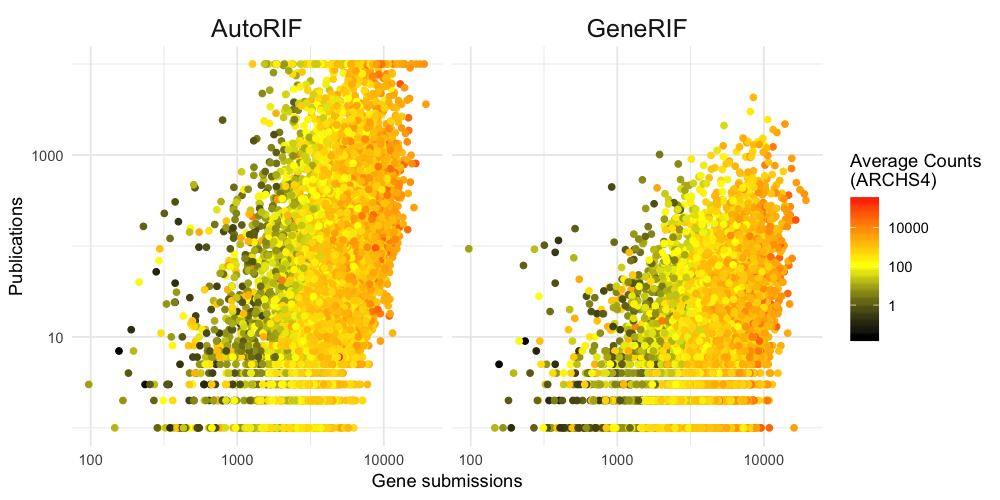

In [166]:
%%R -i filtered_dataframe -h 500 -w 1000 -r 120
ggplot(filtered_dataframe, aes(x=enrichr_counts, y=value, color=average_counts)) +
    geom_point() + 
    scale_color_gradient2('Average Counts\n(ARCHS4)', low='black', mid='yellow', high='red', trans='log10', midpoint=2) + 
    scale_x_log10() + 
    scale_y_log10() + 
    facet_wrap(~variable) + 
    xlab('Gene submissions') +
    ylab('Publications') +
    theme_minimal() +
    theme(strip.text.x = element_text(size = 15))